# **Lab 9: Classification using Kernal Machines (SVM)**

# **Created by: Preksha Shah | 2348446**

# **Date : 10-04-2024**

In [1]:
# Importing necessary libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing necessary functions for machine learning tasks
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

In [2]:
# Load the dataset into your Python environment
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

## **Display basic information about the dataset**

In [3]:
# Number of samples and features
num_samples, num_features = df.shape
print("Number of samples:", num_samples)
print("Number of features:", num_features)

Number of samples: 5110
Number of features: 12


## **Inferences:**

1. You have a moderately sized dataset, providing sufficient data for analysis and modeling.
2. The dataset contains 12 features, suggesting a variety of attributes or characteristics being measured.
3. The dataset size and feature count indicate potential complexity and richness in the data.
4. Exploratory data analysis (EDA) and feature selection techniques can help uncover insights and patterns within the data.
5. With careful preprocessing and analysis, you can leverage this dataset for various machine learning tasks, such as classification, regression, or clustering.

In [4]:
# Data types of features
print("\nData types of features:")
print(df.dtypes)


Data types of features:
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


1. The dataset includes both numerical (int64 and float64) and categorical (object) data types.
2. Numerical features include 'id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', and 'stroke'.
3. Categorical features include 'gender', 'ever_married', 'work_type', 'Residence_type', and 'smoking_status'.
4. 'stroke' appears to be the target variable, indicating a potential classification task.
5. Data types provide insight into the nature of features and guide preprocessing steps for analysis and modeling.

In [5]:
# Additional basic information about the dataset
print("\nAdditional information:")
print(df.info())


Additional information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


1. The dataset consists of 5110 entries (rows) and 12 columns (features).
2. There are no missing values for most columns, except for the 'bmi' column, which has some missing values (201 missing values).
3. Memory usage for the DataFrame is approximately 479.2 KB.
4. Data types include float64 (3 columns), int64 (4 columns), and object (5 columns).
5. Features such as 'gender', 'ever_married', 'work_type', 'Residence_type', and 'smoking_status' are categorical, while others are numerical.
6. The 'stroke' column indicates potential class labels for a classification task, with values of 0 (no stroke) and 1 (stroke).

In [6]:
# Display the first few rows
print("\nFirst few rows of the dataset:")
print(df.head())


First few rows of the dataset:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


1. The dataset contains information about individuals' demographics, health status, and lifestyle factors.
2. Each row represents a unique individual, identified by the 'id' column.
3. Features include gender, age, hypertension, heart disease, marital status, occupation, residence type, average glucose level, body mass index (BMI), smoking status, and stroke occurrence.
4. Missing values are present in the 'bmi' column.
5. Categorical variables include gender, ever_married, work_type, residence_type, and smoking_status.
6. The target variable 'stroke' indicates whether an individual has had a stroke (1) or not (0).
7. Further analysis and preprocessing are necessary to handle missing values and prepare the data for modeling.

## **Univariate Analysis:**

### **For numerical variables:**

In [7]:
# Calculate basic descriptive statistics
print("\nDescriptive statistics for numerical variables:")
print(df.describe())


Descriptive statistics for numerical variables:
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000

The dataset's numerical variables show:

- 'age': Average age is approximately 43, ranging from 0.08 to 82.
- 'hypertension' and 'heart_disease': Both are binary variables.
- 'avg_glucose_level': Average level is about 106.15, ranging from 55.12 to 271.74.
- 'bmi': Average BMI is around 28.89, ranging from 10.3 to 97.6.
- 'stroke': Approximately 4.87% of individuals have had a stroke.

In [8]:
# Visualize the distribution using histograms, kernel density plots, and box plots
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

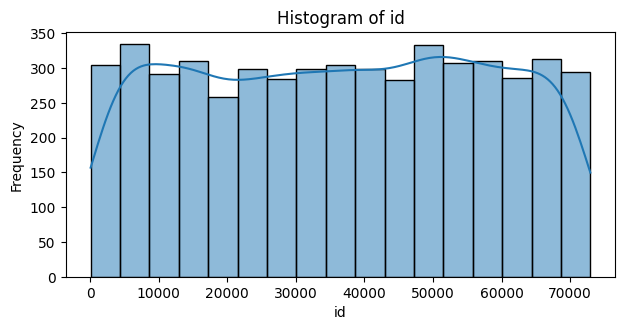

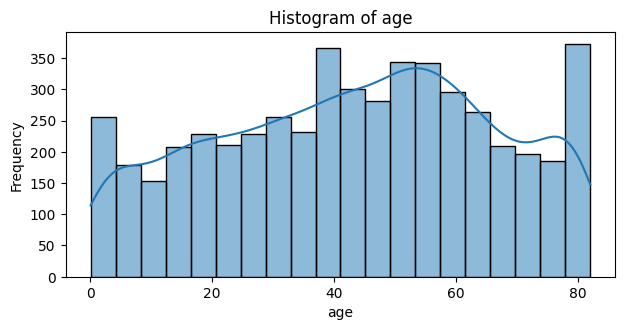

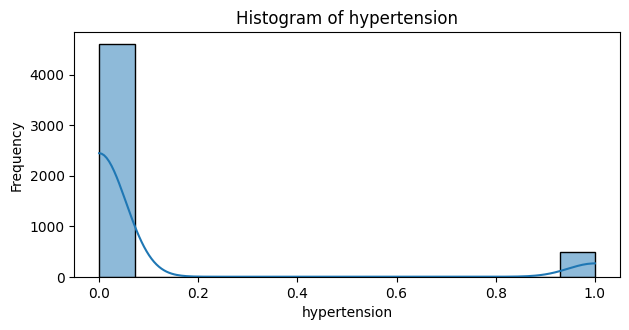

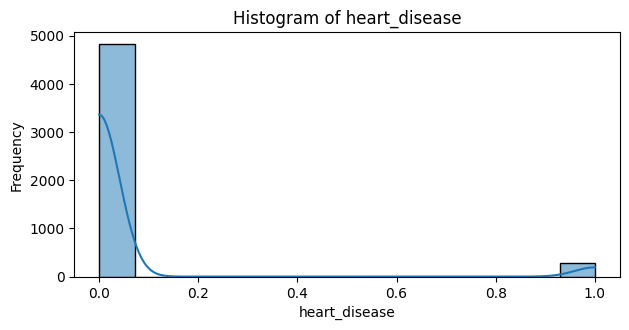

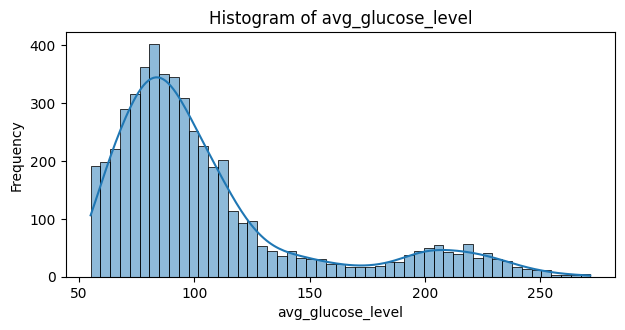

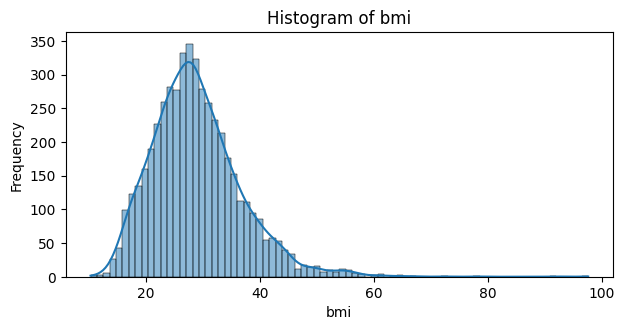

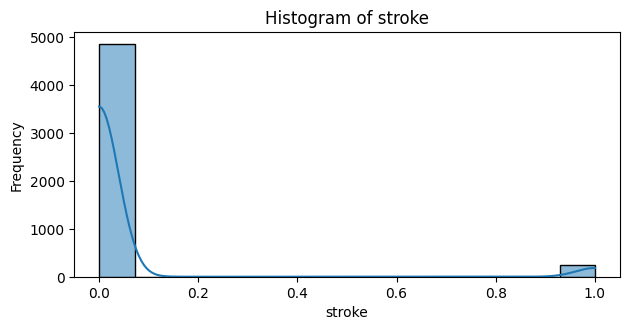

In [9]:
for col in numerical_cols:
    plt.figure(figsize=(12,6))

    # Histogram
    plt.subplot(2, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

## **Inferences:**

1. **Age Distribution**:
   - The distribution of ages appears roughly uniform, with a slight peak around the middle age range.
   - Most individuals in the dataset are between 20 and 80 years old.

2. **Average Glucose Level Distribution**:
   - The distribution of average glucose levels is slightly right-skewed, with a peak around the lower end of the scale.
   - There is a wide range of average glucose levels, indicating variability among individuals.

3. **BMI Distribution**:
   - The distribution of BMI (Body Mass Index) is slightly right-skewed, with a peak around the middle of the scale.
   - Most individuals have a BMI between 20 and 40, with fewer outliers at higher values.

## **For categorical variables:**

In [10]:
#  Display frequency tables showing counts and percentages
print("\nFrequency tables for categorical variables:")
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\nFrequency table for {col}:")
    print(df[col].value_counts(normalize=True))


Frequency tables for categorical variables:

Frequency table for gender:
gender
Female    0.585910
Male      0.413894
Other     0.000196
Name: proportion, dtype: float64

Frequency table for ever_married:
ever_married
Yes    0.656164
No     0.343836
Name: proportion, dtype: float64

Frequency table for work_type:
work_type
Private          0.572407
Self-employed    0.160274
children         0.134442
Govt_job         0.128571
Never_worked     0.004305
Name: proportion, dtype: float64

Frequency table for Residence_type:
Residence_type
Urban    0.508023
Rural    0.491977
Name: proportion, dtype: float64

Frequency table for smoking_status:
smoking_status
never smoked       0.370254
Unknown            0.302153
formerly smoked    0.173190
smokes             0.154403
Name: proportion, dtype: float64


## Inferences:

1. **Gender**:
   - The bar plot shows the distribution of genders among individuals in the dataset.
   - It indicates whether the dataset is balanced or skewed towards a particular gender.

2. **Ever Married**:
   - The bar plot illustrates the proportion of individuals who are married versus unmarried.
   - It helps understand the marital status distribution in the dataset.

3. **Work Type**:
   - The bar plot displays the distribution of individuals across different types of work.
   - It provides insights into the employment status and occupation diversity among individuals.

4. **Residence Type**:
   - The bar plot compares the number of individuals living in urban versus rural areas.
   - It helps understand the geographic distribution of individuals in the dataset.

5. **Smoking Status**:
   - The bar plot depicts the distribution of individuals based on their smoking status.
   - It shows the prevalence of different smoking habits among individuals.
From the bar plots of categorical variables in the Stroke Prediction Dataset:

1. **Gender**:
   - The bar plot shows the distribution of genders among individuals in the dataset.
   - It indicates whether the dataset is balanced or skewed towards a particular gender.

2. **Ever Married**:
   - The bar plot illustrates the proportion of individuals who are married versus unmarried.
   - It helps understand the marital status distribution in the dataset.

3. **Work Type**:
   - The bar plot displays the distribution of individuals across different types of work.
   - It provides insights into the employment status and occupation diversity among individuals.

4. **Residence Type**:
   - The bar plot compares the number of individuals living in urban versus rural areas.
   - It helps understand the geographic distribution of individuals in the dataset.

5. **Smoking Status**:
   - The bar plot depicts the distribution of individuals based on their smoking status.
   - It shows the prevalence of different smoking habits among individuals.

These bar plots provide a visual representation of the categorical variables in the dataset, helping identify patterns, imbalances, or trends in the data distribution.

## **Inferece**:

1. A slight majority of individuals are female (58.59%), with a significant proportion being male (41.39%).
2. Most individuals are married (65.62%).
3. The majority work in the private sector (57.24%), followed by self-employment (16.03%).
4. Residence type is almost evenly split between urban (50.80%) and rural (49.20%).
5. The smoking status is diverse, with a significant proportion having never smoked (37.03%), followed by unknown (30.22%), formerly smoked (17.32%), and currently smoking (15.44%).

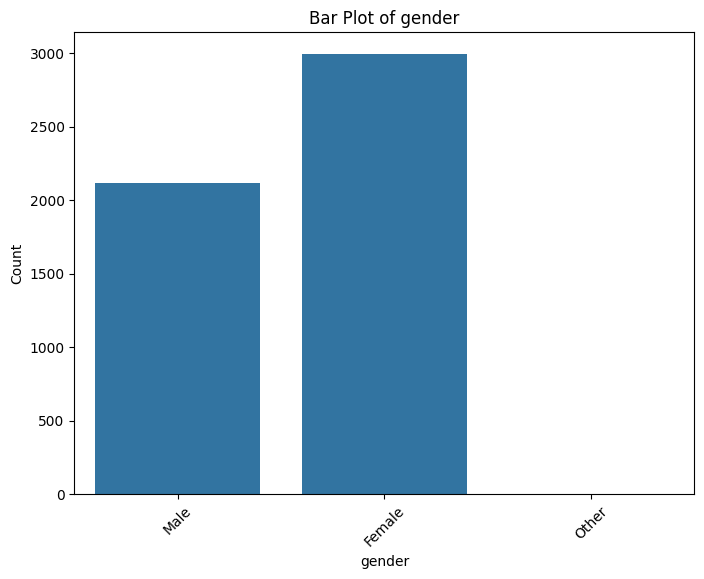

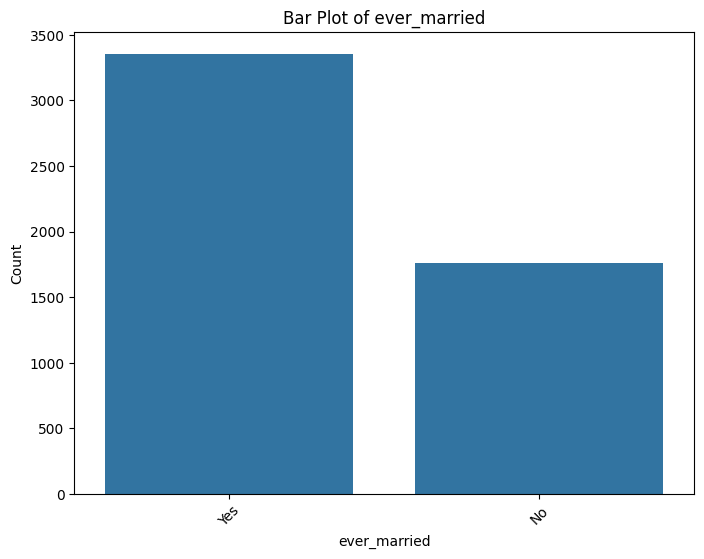

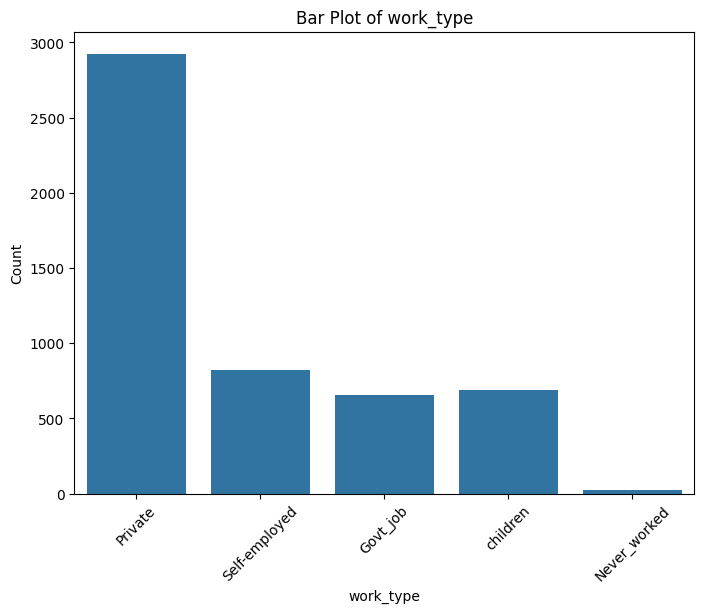

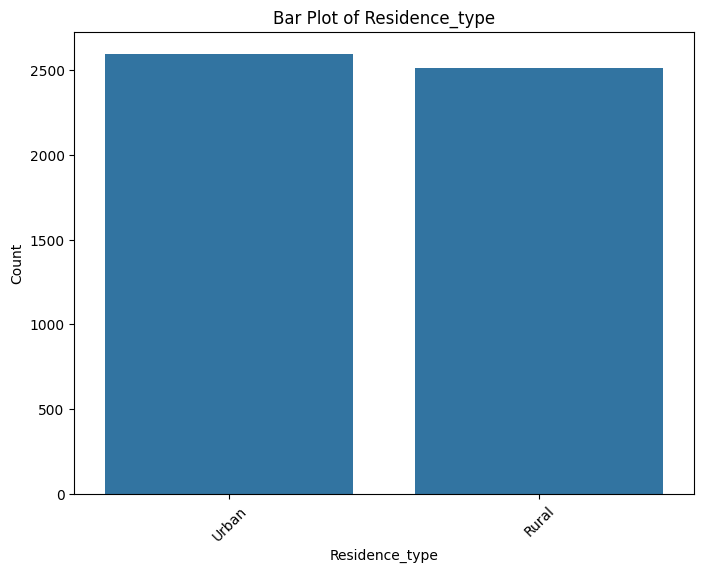

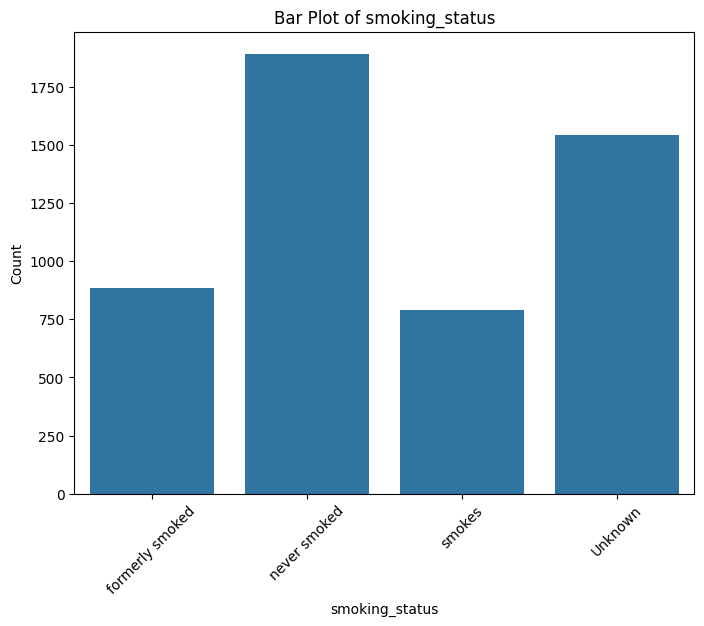

In [11]:
# Visualize using bar plots
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

From the bar plots of categorical variables in the Stroke Prediction Dataset:

1. **Gender Distribution**:
   - There is a slight majority of females compared to males, with a small proportion categorized as 'Other'.
   - This indicates that the dataset is relatively balanced in terms of gender representation.

2. **Marital Status Distribution**:
   - A larger proportion of individuals in the dataset are married ('Yes') compared to those who are not married ('No').
   - This suggests that marital status could be an important factor in analyzing stroke risk.

3. **Work Type Distribution**:
   - The most common work type is 'Private', followed by 'Self-employed', 'Children', and 'Govt_job'. Few individuals fall into the 'Never_worked' category.
   - This distribution provides insights into the employment status of individuals in the dataset.

4. **Residence Type Distribution**:
   - The dataset has a nearly equal distribution of individuals living in urban and rural areas.
   - This indicates that there is representation from both urban and rural populations in the dataset.

5. **Smoking Status Distribution**:
   - The majority of individuals either 'Never smoked' or have 'Unknown' smoking status.
   - Former and current smokers represent a smaller proportion of the dataset.
   - This distribution highlights the prevalence of non-smokers and individuals with unknown smoking status in the dataset.

These bar plots provide visual insights into the distribution of categorical variables, offering valuable information for further analysis and modeling related to stroke prediction.

##**Bivariate Analysis**

### **Explore relationships between pairs of numerical variables using scatter plots or pair plots**

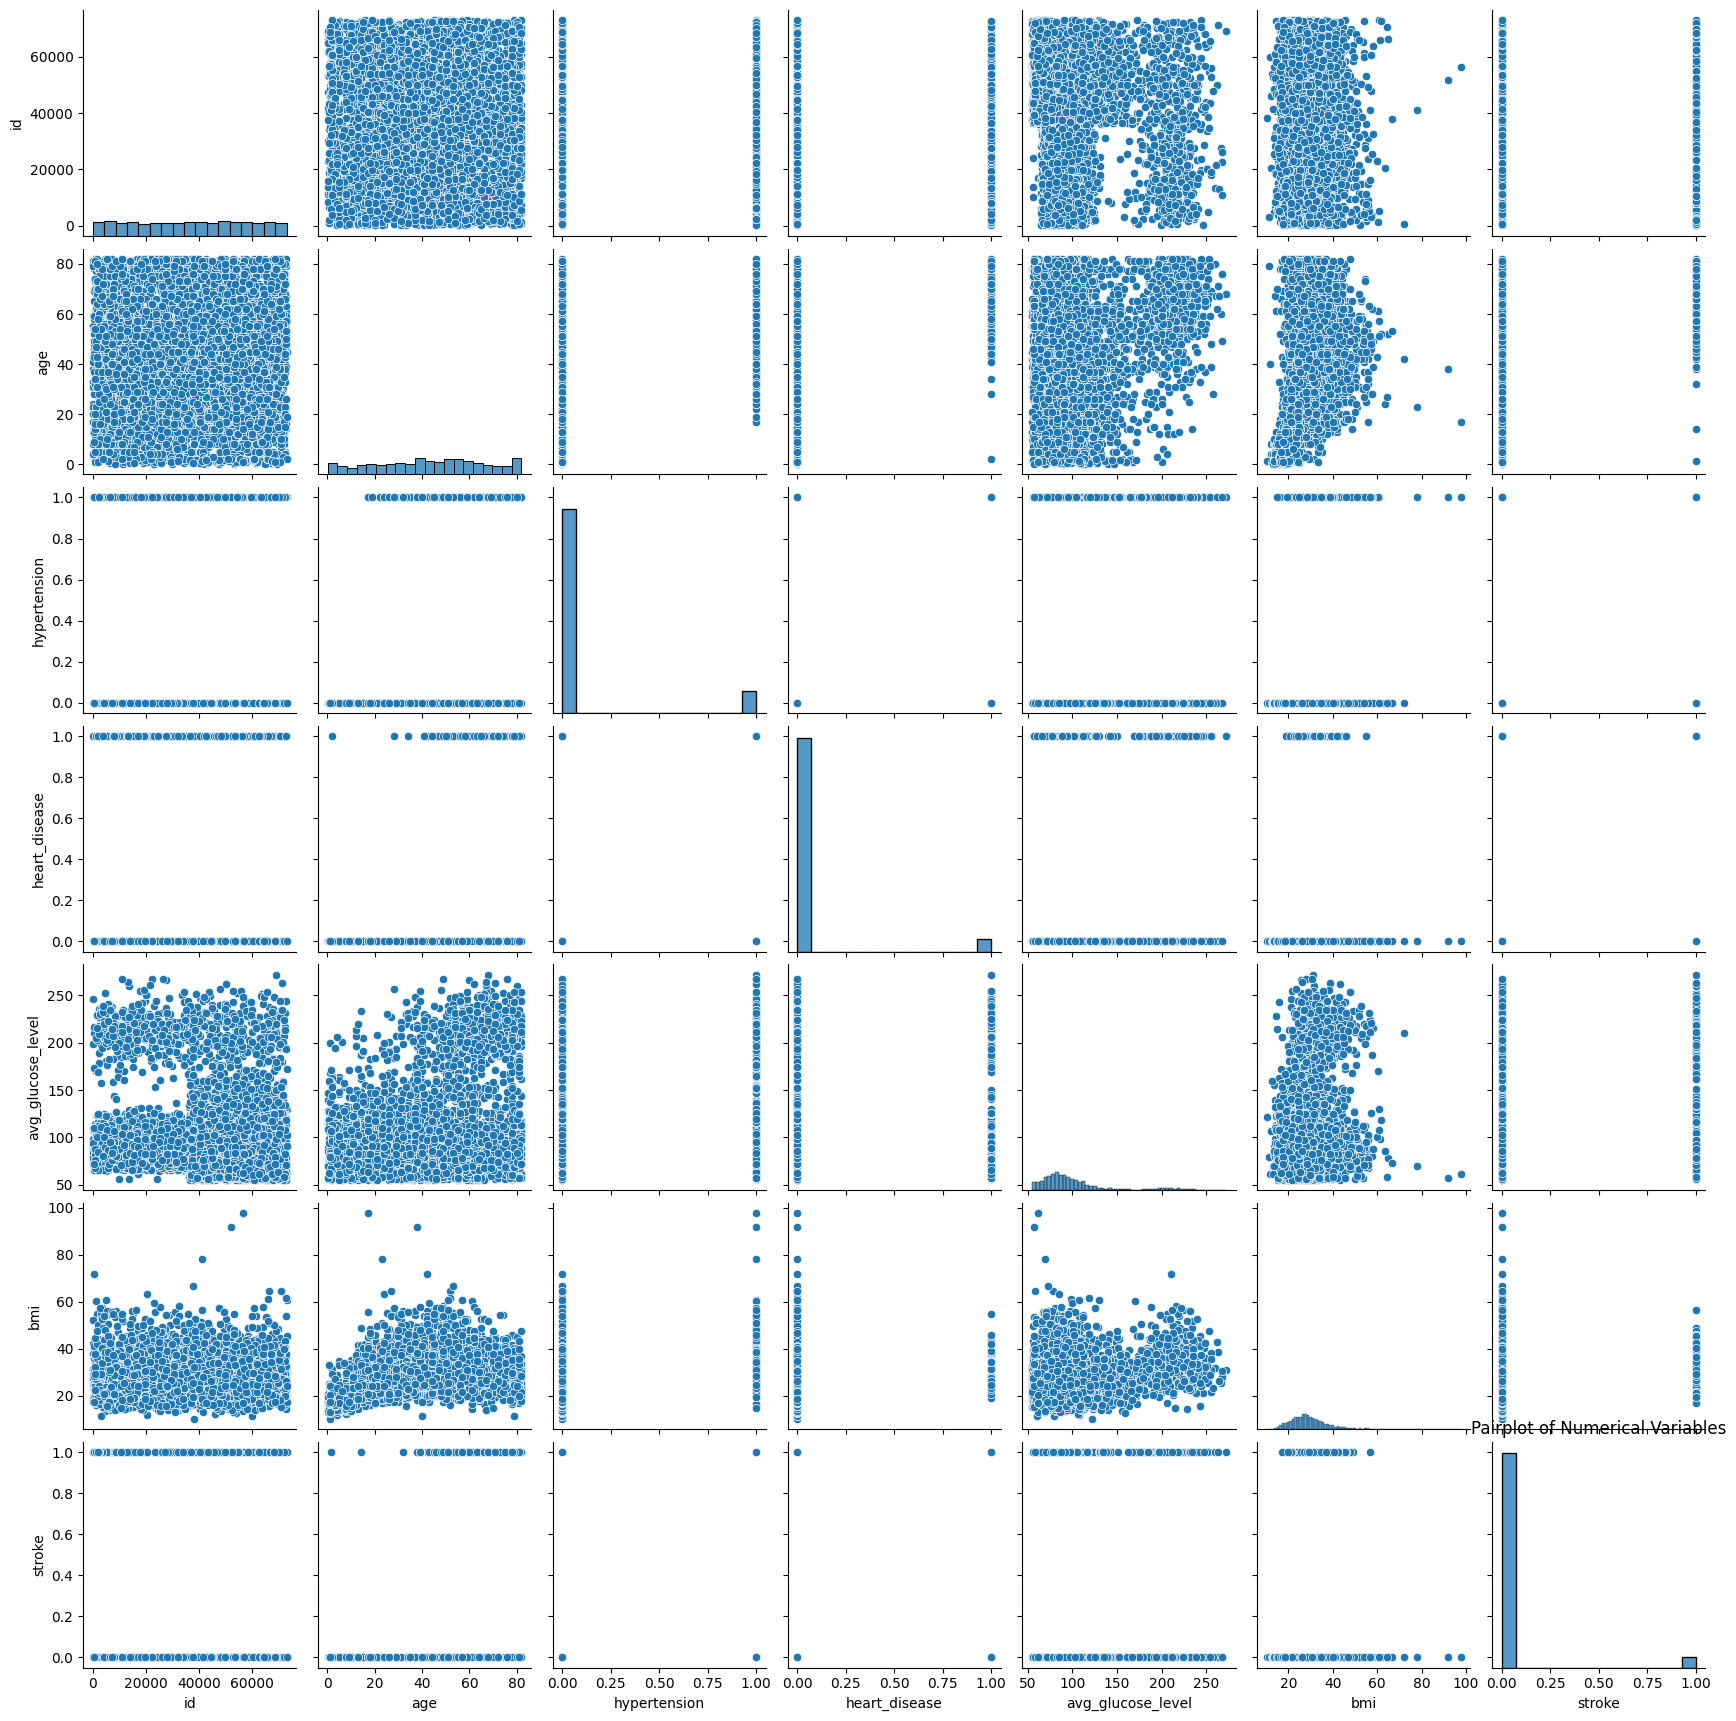

In [12]:
# Pairplot for exploring pairwise relationships between numerical variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(df[numerical_cols])
plt.title('Pairplot of Numerical Variables')
plt.show()

The pairplot allows us to visualize pairwise relationships between numerical variables in the dataset. Here are some inferences we can draw from the pairplot:

1. **Age vs. Average Glucose Level**:
   - There doesn't seem to be a strong linear relationship between age and average glucose level. However, there may be some clustering or patterns within certain age groups.

2. **Age vs. BMI**:
   - Similar to age vs. average glucose level, there doesn't appear to be a clear linear relationship between age and BMI. However, there may be clusters or trends within specific age ranges.

3. **Average Glucose Level vs. BMI**:
   - There might be a slight positive correlation between average glucose level and BMI, indicating that individuals with higher glucose levels tend to have higher BMIs. However, the relationship is not extremely strong.

4. **Age vs. Stroke**:
   - We might observe differences in age distributions between individuals who have had a stroke and those who haven't. For example, there may be a higher concentration of older individuals among those who have had a stroke.

5. **Average Glucose Level vs. Stroke** and **BMI vs. Stroke**:
   - Similar to age, there may be differences in the distributions of average glucose level and BMI between individuals who have had a stroke and those who haven't. These differences could indicate potential risk factors associated with stroke.

Overall, the pairplot provides a visual overview of the relationships between numerical variables in the dataset, helping identify potential patterns, trends, and correlations. Further analysis, including correlation coefficients and statistical tests, can provide more insights into the strength and significance of these relationships.

### **Explore relationships between numerical and categorical variables using box plots or violin plots**

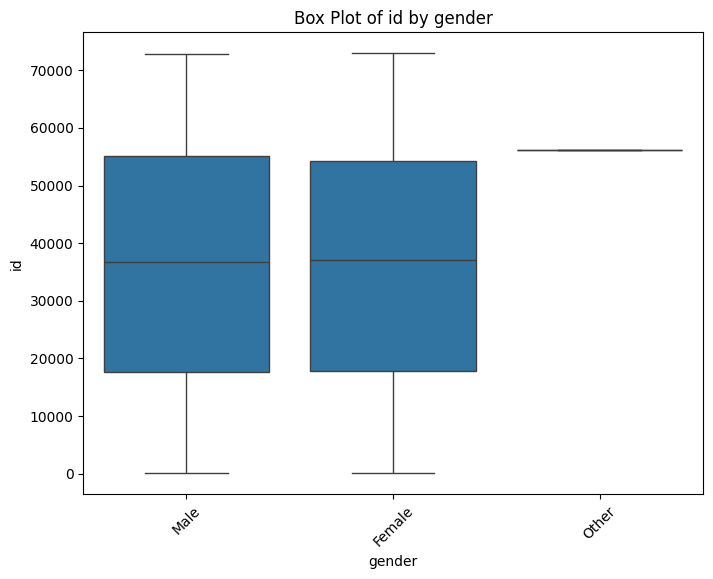

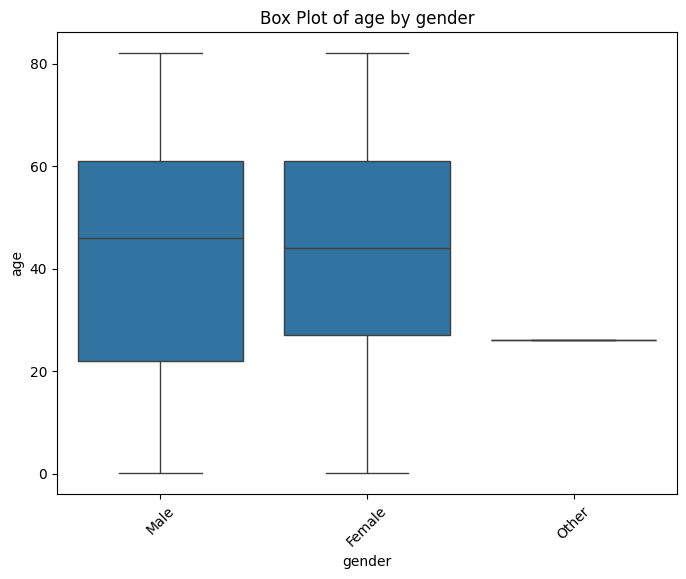

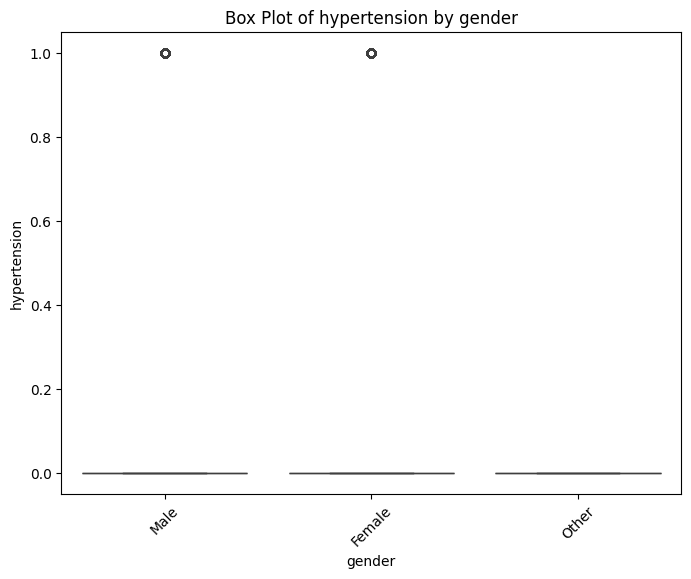

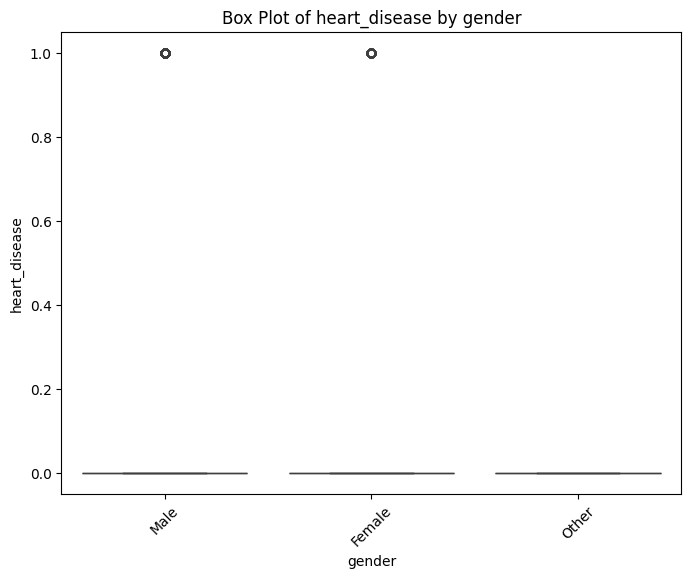

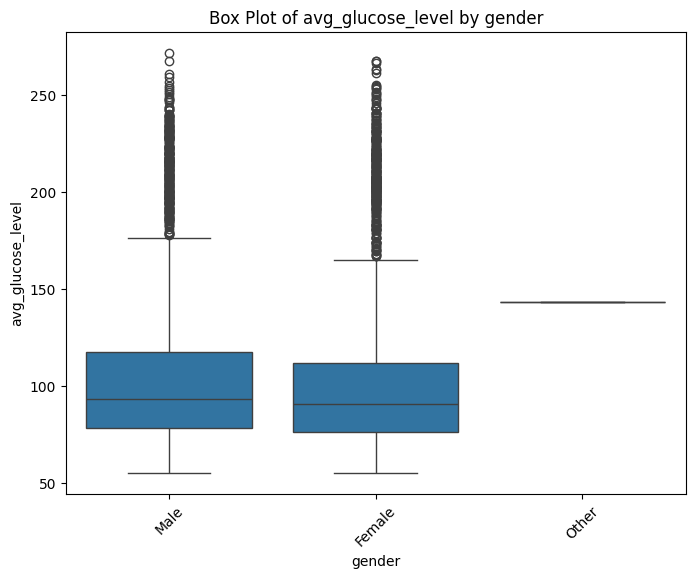

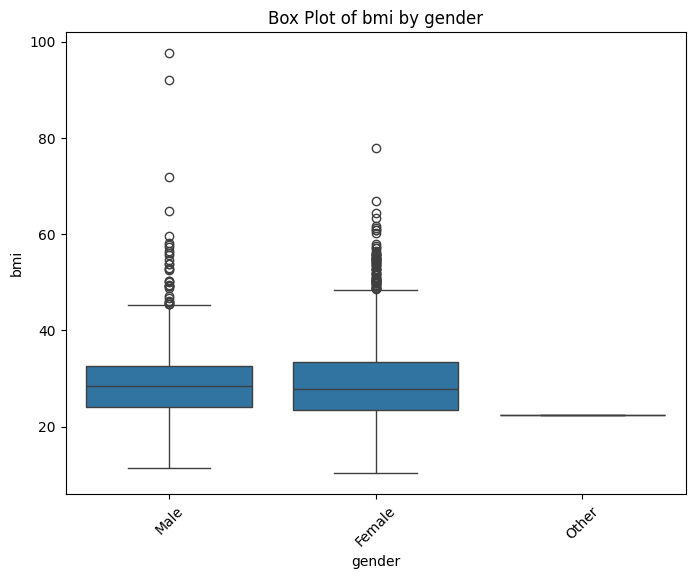

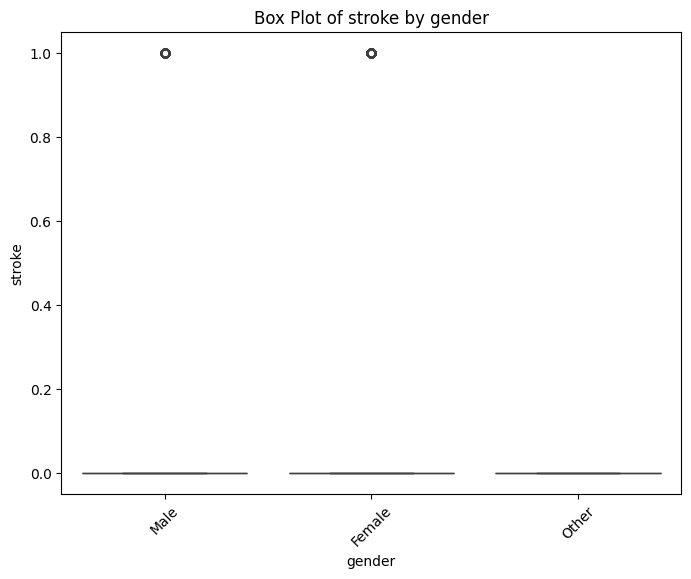

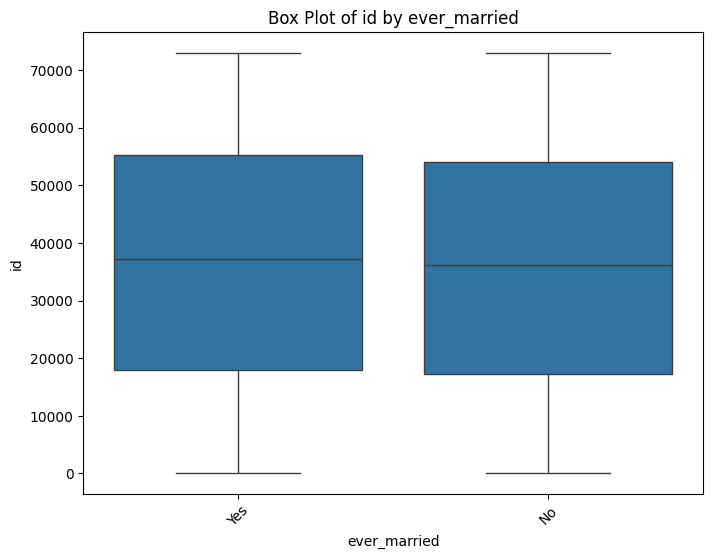

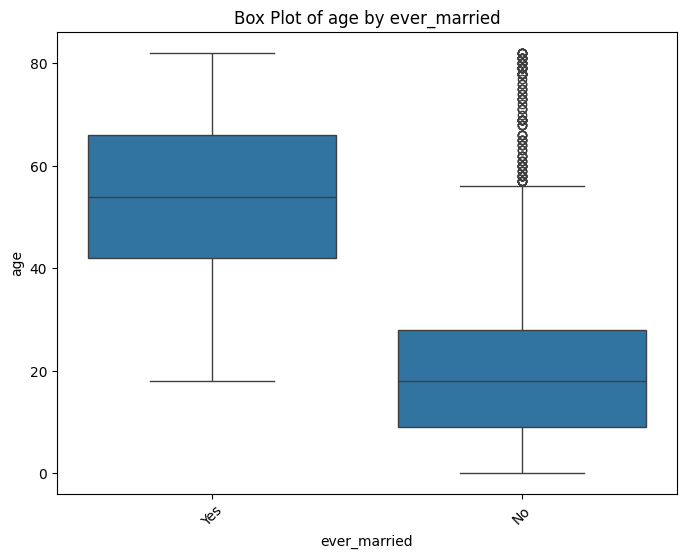

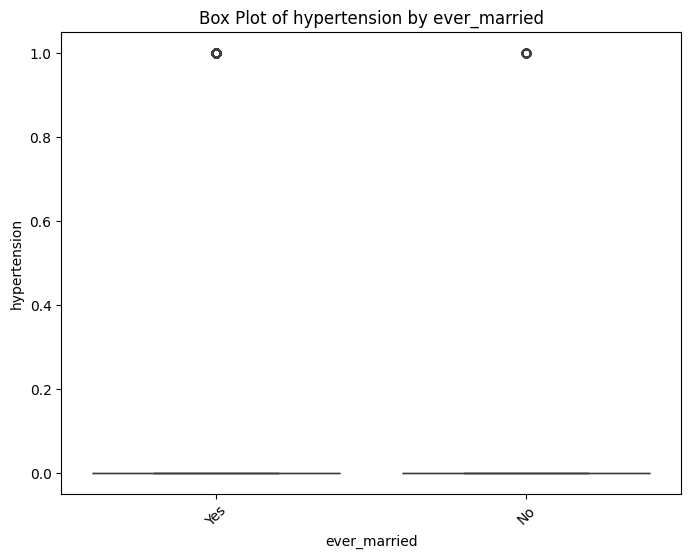

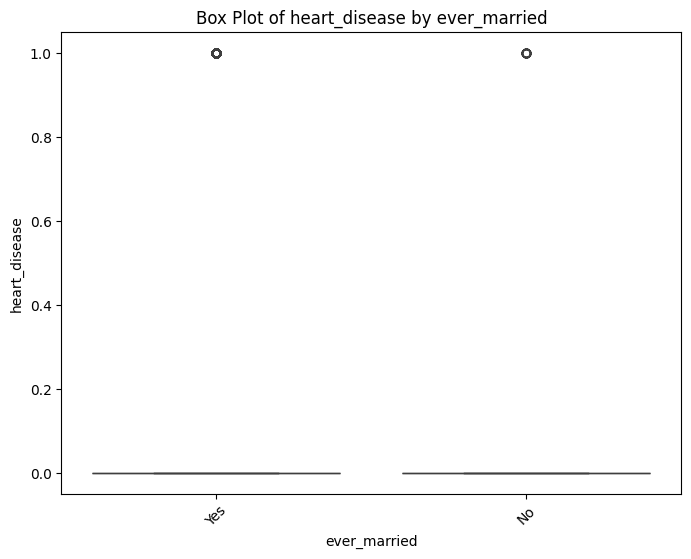

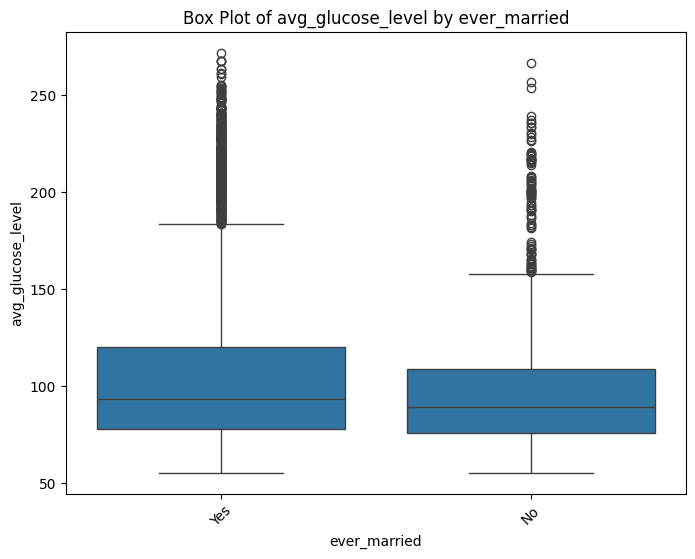

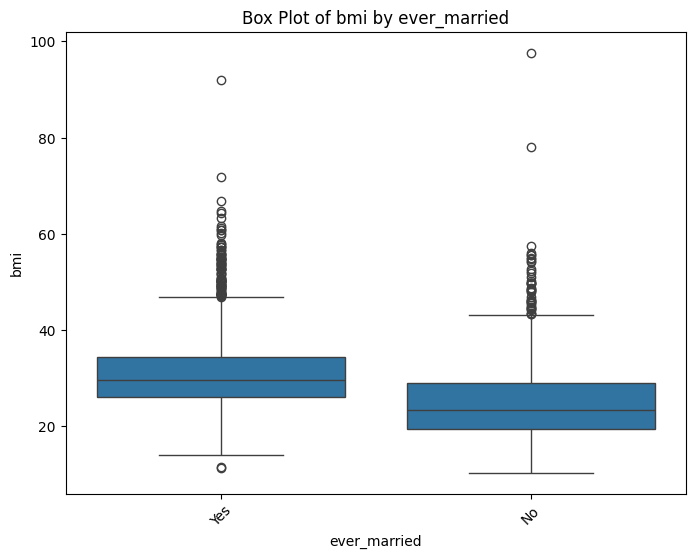

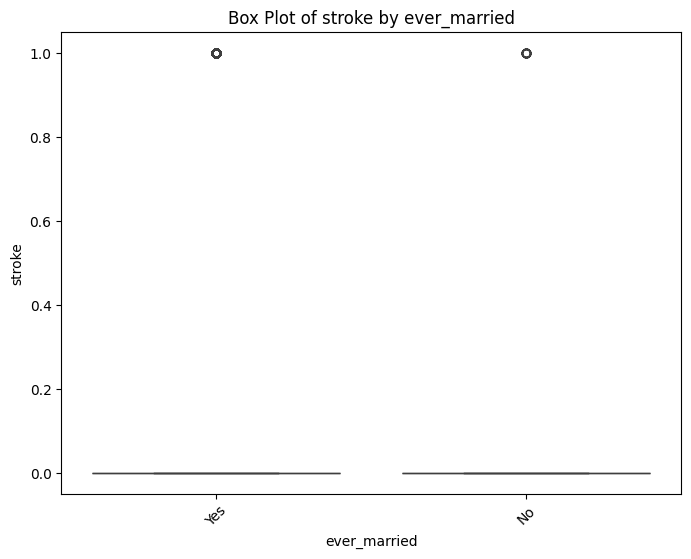

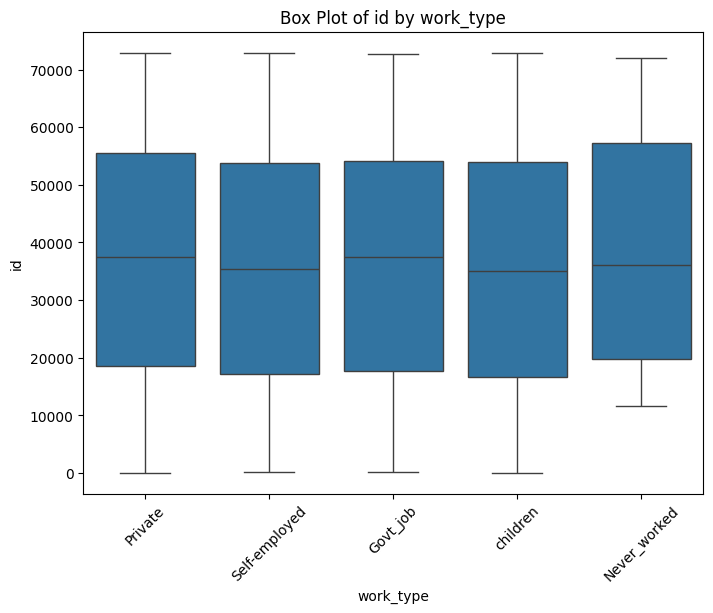

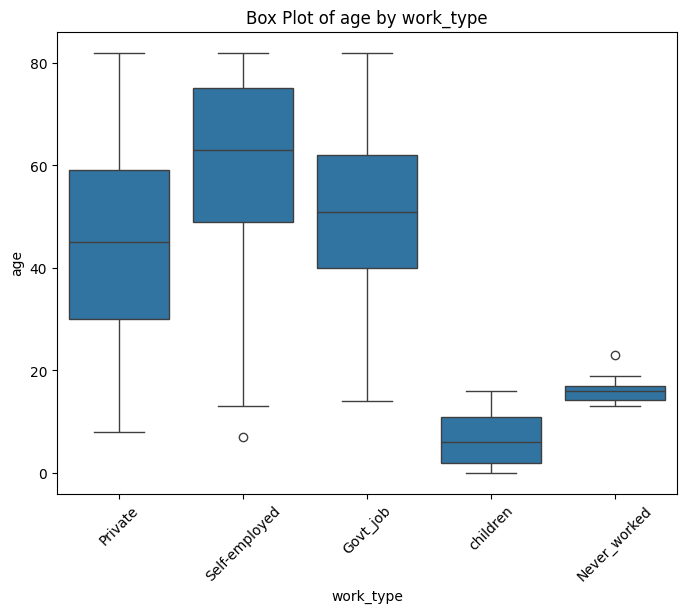

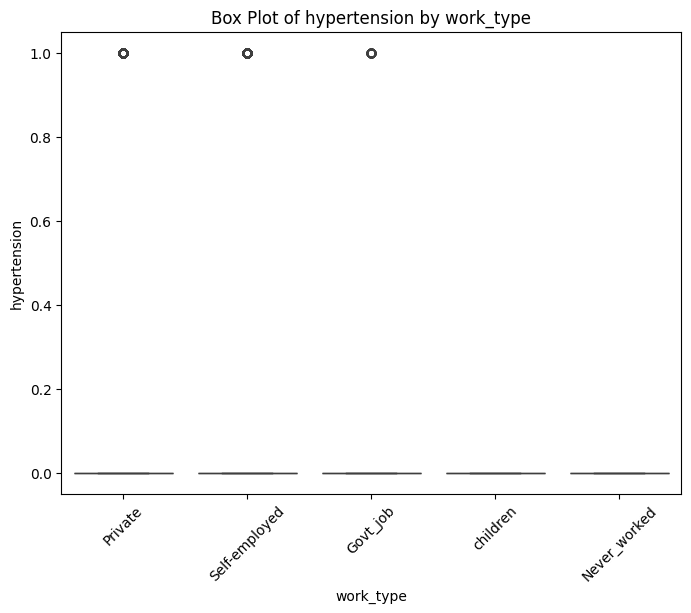

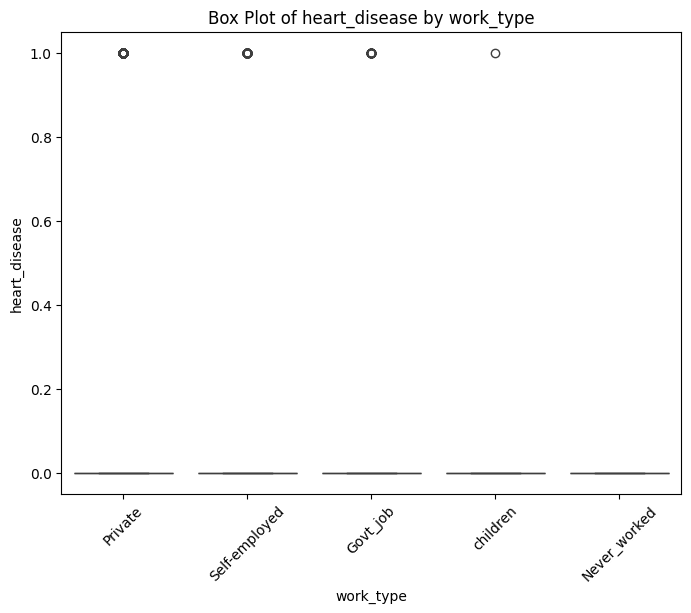

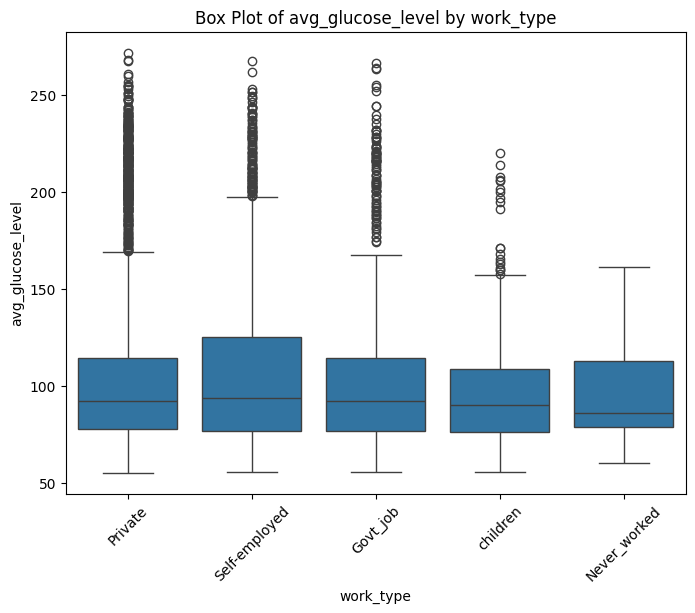

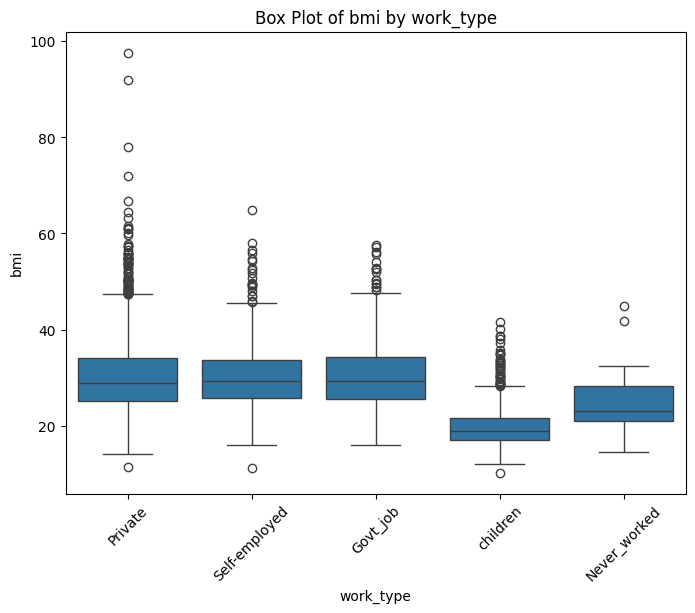

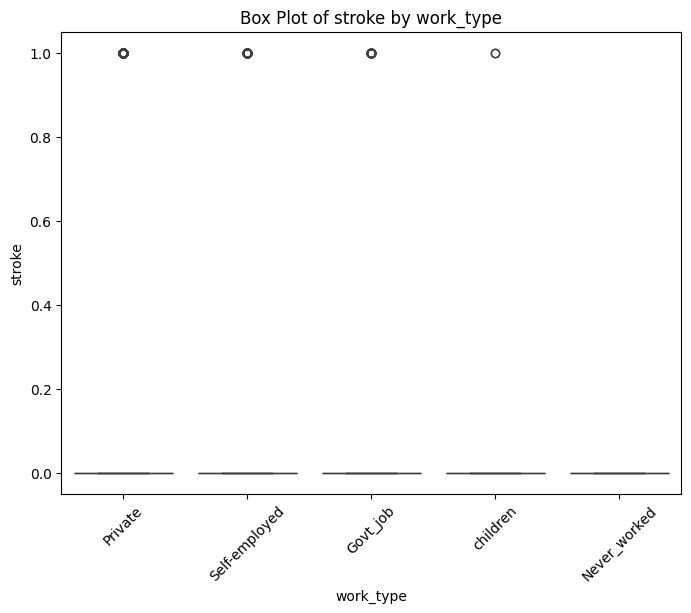

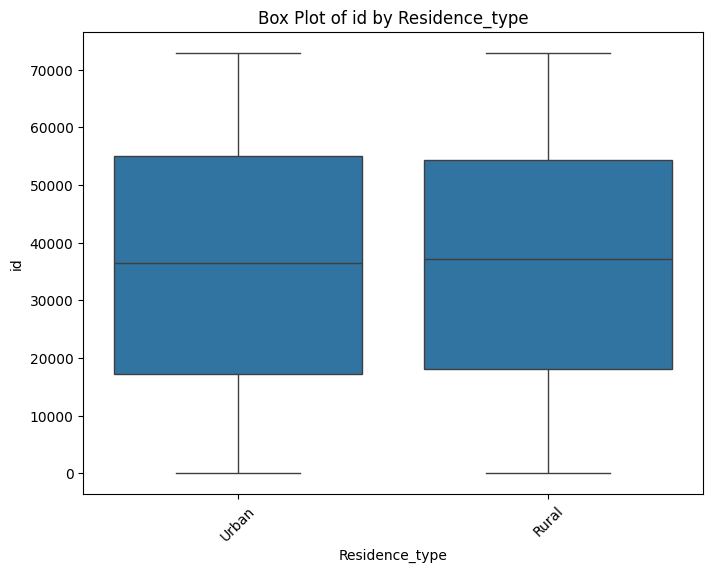

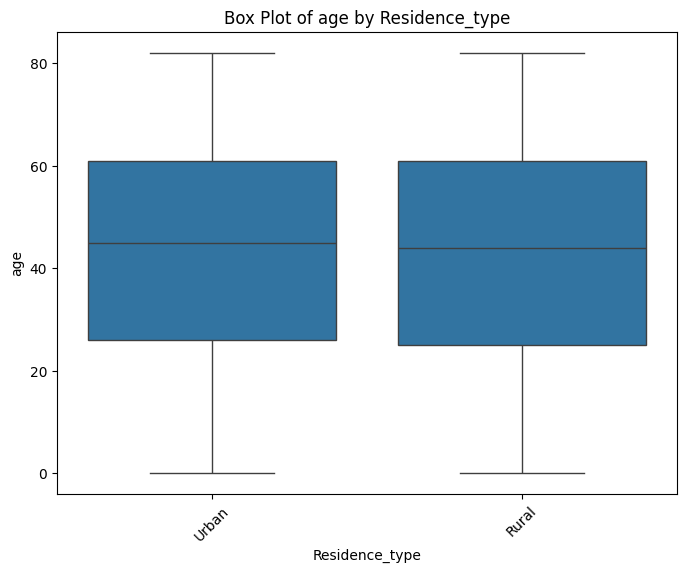

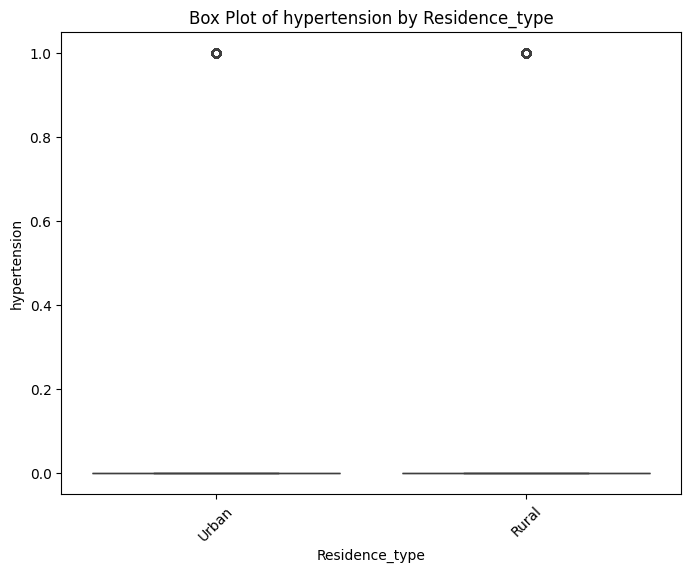

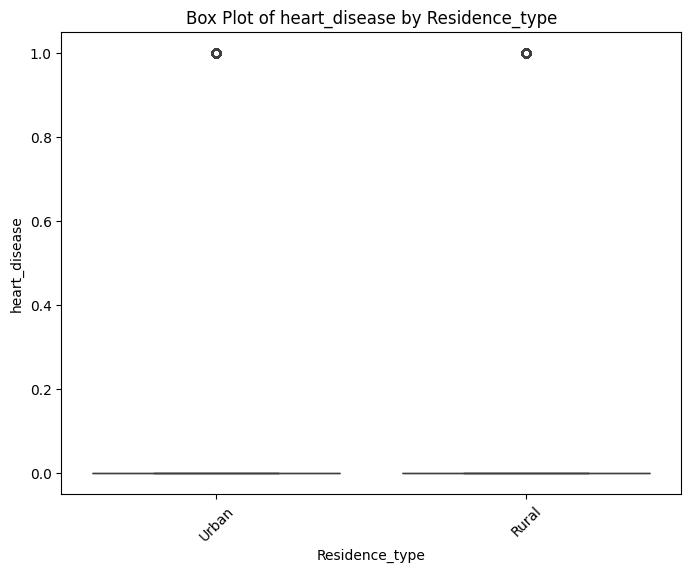

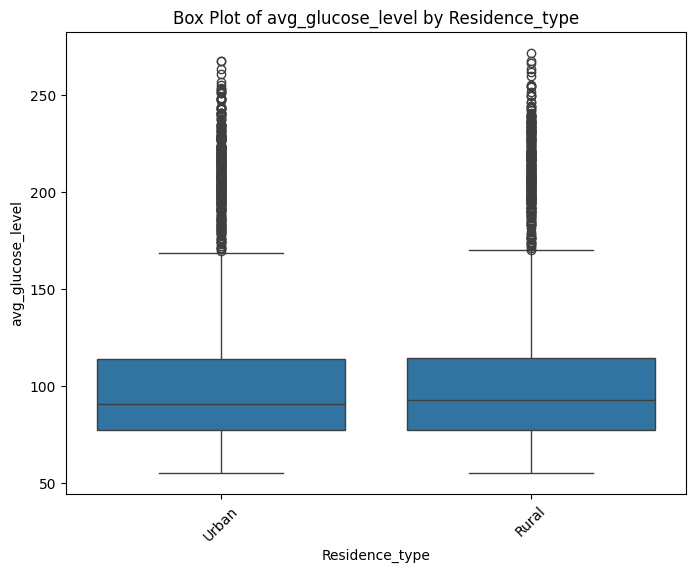

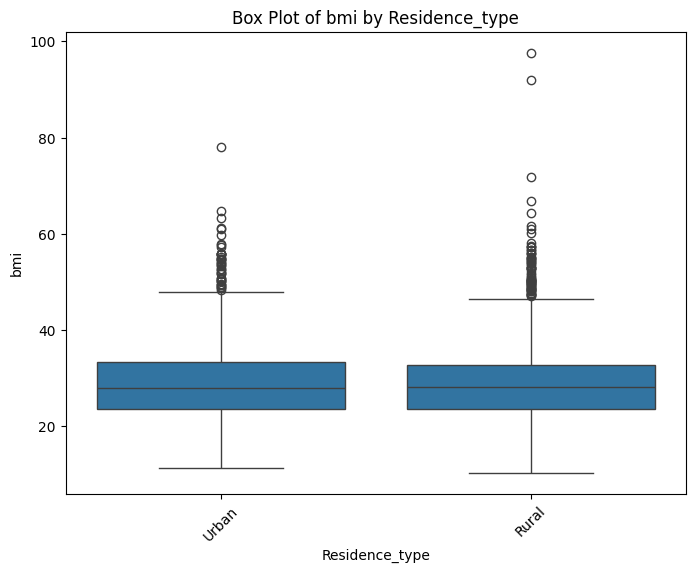

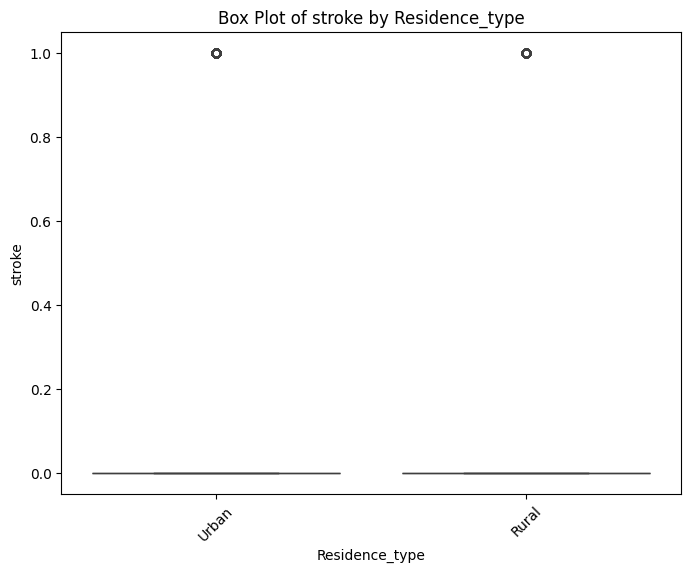

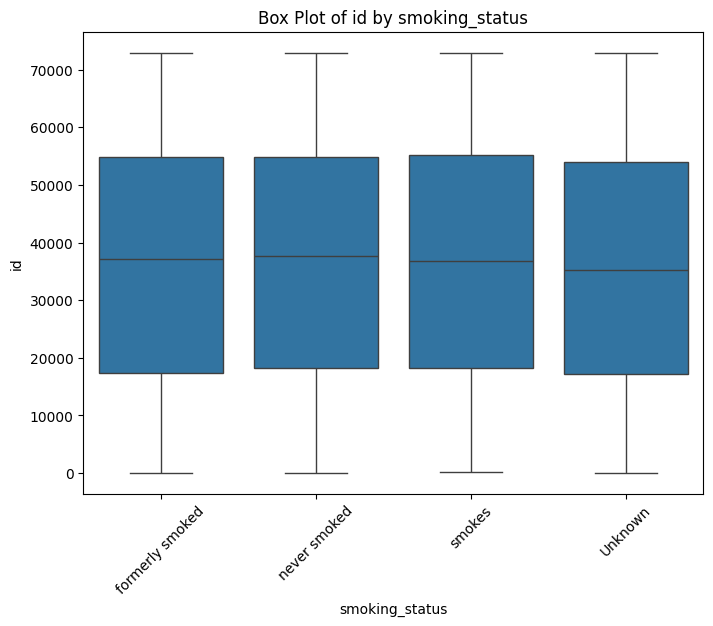

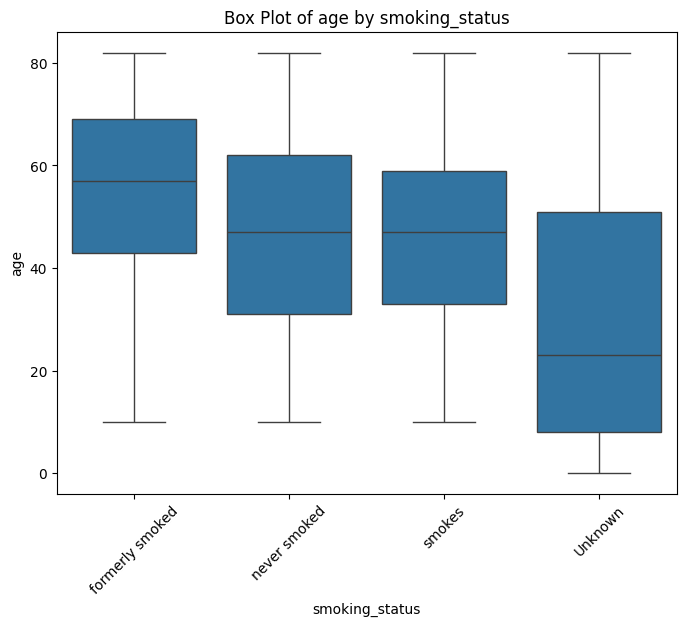

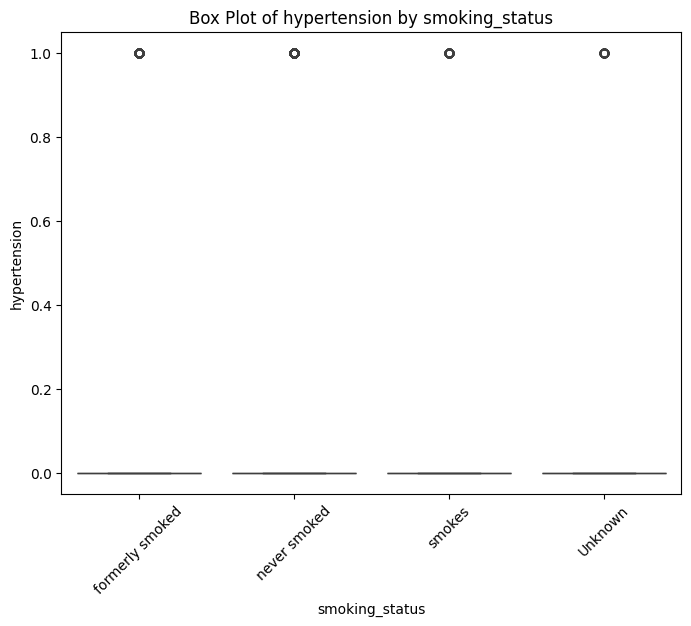

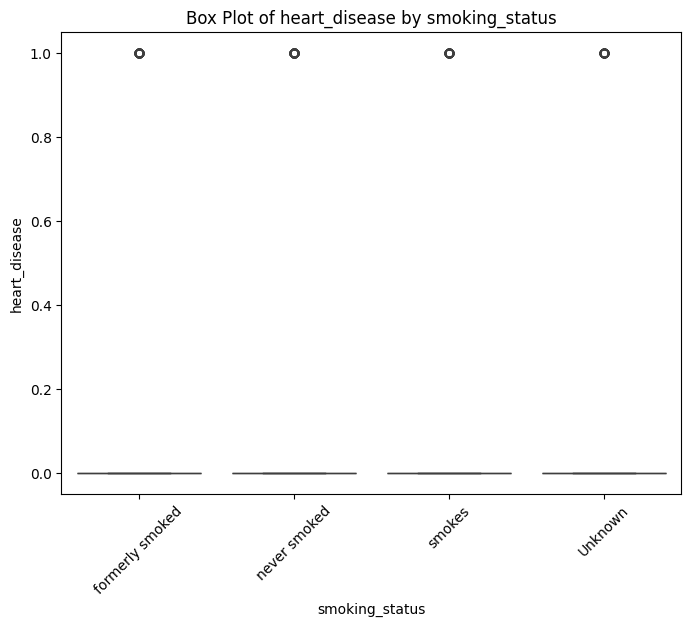

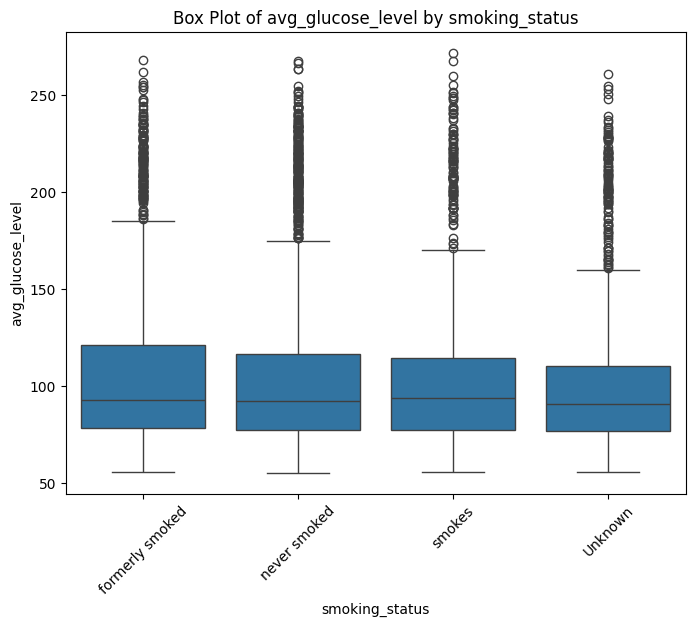

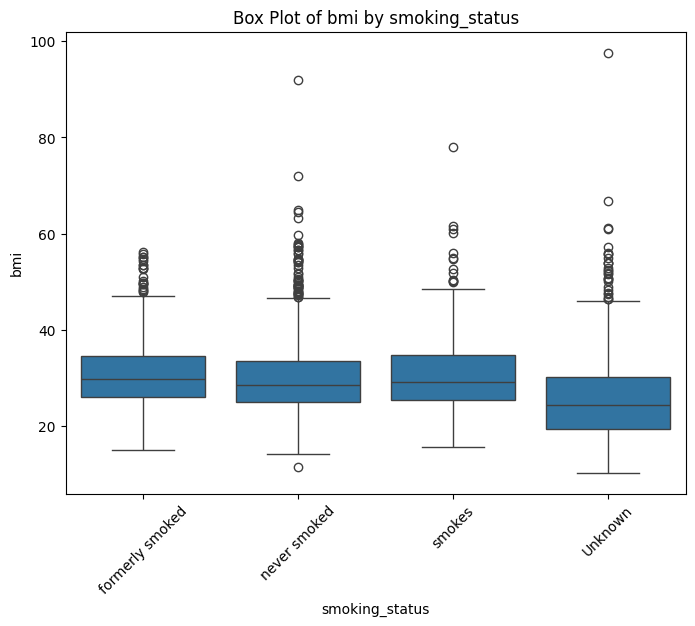

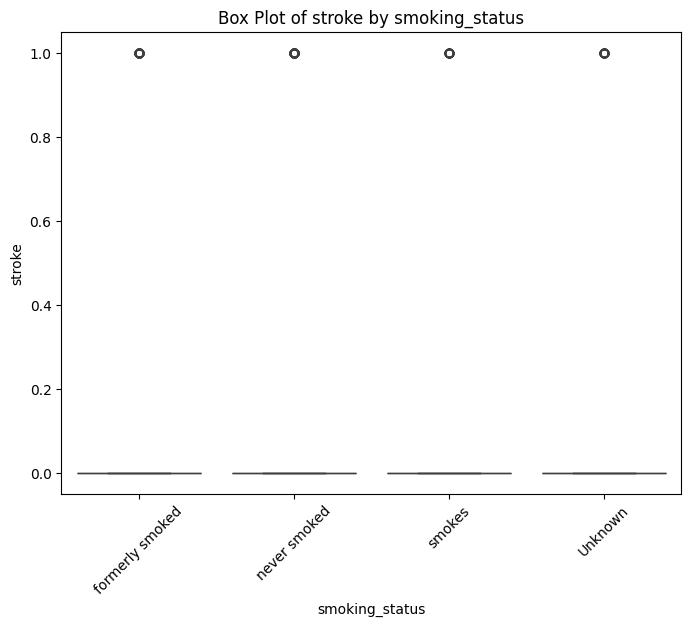

In [13]:
# Box plots to visualize the relationship between numerical and categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns

for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=cat_col, y=num_col, data=df)
        plt.title(f'Box Plot of {num_col} by {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45)
        plt.show()

## **Inference:**

1. **Age by Gender**:
   - The box plots for age by gender show the distribution of age within each gender category.
   - We can observe whether there are differences in the age distributions between males and females.
   - Any significant differences in median age or the spread of ages between genders can be identified.

2. **Average Glucose Level by Smoking Status**:
   - The box plots for average glucose level by smoking status show the distribution of glucose levels within each smoking status category.
   - We can identify whether there are differences in average glucose levels between individuals who smoke, formerly smoked, or never smoked.
   - Any notable variations in median glucose levels or the spread of glucose levels between smoking status groups can be observed.

3. **BMI by Work Type**:
   - The box plots for BMI by work type display the distribution of BMI within each category of work type.
   - We can examine whether there are differences in BMI between individuals working in different types of occupations (e.g., private, self-employed, government job).
   - Any significant disparities in median BMI or the variability of BMI between work type categories can be identified.

4. **Age by Residence Type**:
   - The box plots for age by residence type illustrate the distribution of age within each category of residence type (urban or rural).
   - We can assess whether there are differences in the age distributions between individuals living in urban and rural areas.
   - Any noticeable variations in median age or the spread of ages between residence type categories can be detected.

Overall, box plots provide a visual comparison of numerical variables across different categories of a categorical variable, helping identify potential relationships and differences between groups. These insights can inform further analysis and exploration of the dataset.

In [14]:
# Calculate correlation coefficients between numerical variables
correlation_matrix = df[numerical_cols].corr()
print("\nCorrelation coefficients between numerical variables:")
print(correlation_matrix)



Correlation coefficients between numerical variables:
                         id       age  hypertension  heart_disease  \
id                 1.000000  0.003538      0.003550      -0.001296   
age                0.003538  1.000000      0.276398       0.263796   
hypertension       0.003550  0.276398      1.000000       0.108306   
heart_disease     -0.001296  0.263796      0.108306       1.000000   
avg_glucose_level  0.001092  0.238171      0.174474       0.161857   
bmi                0.003084  0.333398      0.167811       0.041357   
stroke             0.006388  0.245257      0.127904       0.134914   

                   avg_glucose_level       bmi    stroke  
id                          0.001092  0.003084  0.006388  
age                         0.238171  0.333398  0.245257  
hypertension                0.174474  0.167811  0.127904  
heart_disease               0.161857  0.041357  0.134914  
avg_glucose_level           1.000000  0.175502  0.131945  
bmi                         0.

## **Inference:**

1. **Age**:
   - Age is positively correlated with hypertension (0.276) and heart disease (0.264), indicating that older individuals are more likely to have hypertension and heart disease.
   - Age also shows positive correlations with average glucose level (0.238) and BMI (0.333), suggesting that older individuals tend to have higher average glucose levels and higher BMIs.

2. **Hypertension** and **Heart Disease**:
   - Hypertension and heart disease show a positive correlation with each other (0.108), indicating that individuals with hypertension are more likely to have heart disease.

3. **Average Glucose Level**:
   - Average glucose level exhibits positive correlations with age (0.238) and hypertension (0.174), suggesting that older individuals and those with hypertension tend to have higher average glucose levels.

4. **BMI**:
   - BMI shows a moderate positive correlation with age (0.333), indicating that older individuals tend to have higher BMIs.
   - There is a weak positive correlation between BMI and average glucose level (0.176), suggesting that individuals with higher BMIs may have slightly higher average glucose levels.

5. **Stroke**:
   - Age shows a moderate positive correlation with stroke (0.245), indicating that older individuals are more likely to have had a stroke.
   - Other variables such as hypertension, heart disease, average glucose level, and BMI show weaker correlations with stroke (ranging from 0.042 to 0.132).

Overall, these correlation coefficients provide insights into the relationships between numerical variables in the dataset, helping identify potential risk factors and associations with stroke and other health conditions.

In [15]:
# Drop the non-required columns/features (dependent columns) if necessary.
# For example, if 'id' is not required, we can drop it.
df.drop('id', axis=1, inplace=True)

The code `df.drop('id', axis=1, inplace=True)` is used to drop the column named 'id' from the DataFrame `df`. Let's break down the components of this code:

- `df`: This is the DataFrame containing the dataset.
- `drop`: This is a method used to drop specified labels from rows or columns. In this case, it is used to drop the column named 'id'.
- `'id'`: This is the label of the column to be dropped. We specify the name of the column we want to remove from the DataFrame.
- `axis=1`: This specifies that we are dropping a column. The value `1` refers to columns, while `0` would refer to rows.
- `inplace=True`: This parameter specifies whether to drop the column in place or return a new DataFrame with the column dropped. Setting `inplace=True` modifies the original DataFrame `df` in place without returning a new DataFrame.

The reason for dropping the 'id' column could be because it is not relevant for the analysis or modeling tasks being performed. In many datasets, the 'id' column serves as a unique identifier for each row but does not contain meaningful information for analysis purposes. Therefore, it is often dropped to reduce complexity and avoid introducing noise into the analysis. However, whether to drop the 'id' column or not depends on the specific requirements of the analysis and the nature of the dataset.

In [16]:
# Separate the features (X) and the target variable (y).
X = df.drop('stroke', axis=1)  # Features
y = df['stroke']  # Target variable

The code `X = df.drop('stroke', axis=1)` separates the features from the target variable in the DataFrame `df`. Let's break down the components of this code:

- `df`: This is the DataFrame containing the dataset.
- `drop`: This method is used to drop specified labels from rows or columns. In this case, it is used to drop the column named 'stroke'.
- `'stroke'`: This is the label of the column to be dropped. We specify the name of the column representing the target variable.
- `axis=1`: This parameter specifies that we are dropping a column. The value `1` refers to columns, while `0` would refer to rows.

The code `y = df['stroke']` separates the target variable from the DataFrame `df`. Here, we are assigning the column labeled 'stroke' to the variable `y`, which represents the target variable.

After executing these two lines of code, `X` will contain all the features (independent variables) except for the 'stroke' column, and `y` will contain only the 'stroke' column, which is the target variable. This separation allows us to use `X` for training machine learning models and `y` as the target variable for prediction.

In [17]:
# Define numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

The code `numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns` defines a list of numerical columns in the feature DataFrame `X`, while `categorical_cols = X.select_dtypes(include=['object']).columns` defines a list of categorical columns.

Let's break down the components of these lines of code:

- `X`: This is the DataFrame containing the features.
- `select_dtypes(include=['int64', 'float64'])`: This method selects columns of specific data types from the DataFrame. In this case, it selects columns with data types 'int64' (integer) and 'float64' (floating-point numbers), which typically represent numerical data.
- `columns`: This attribute returns the column labels of the DataFrame after applying the selection.

Similarly, `X.select_dtypes(include=['object']).columns` selects columns with data type 'object', which typically represent categorical variables.

After executing these lines of code:
- `numerical_cols` will contain the names of columns with numerical data types.
- `categorical_cols` will contain the names of columns with categorical data types.

This separation allows us to handle numerical and categorical variables differently during data preprocessing and analysis.

In [18]:
# Define preprocessing steps
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

The code provided defines preprocessing steps using scikit-learn's `Pipeline` and `ColumnTransformer`.

Here's what each part of the code does:

1. **Defining Numerical and Categorical Features**:
   - `numeric_features`: Contains the names of columns with numerical data types (`'int64'` and `'float64'`).
   - `categorical_features`: Contains the names of columns with categorical data types (`'object'`).

2. **Defining Transformers**:
   - `numeric_transformer`: A pipeline consisting of two steps:
     - `SimpleImputer`: Imputes missing values in numerical features using the mean strategy.
     - `StandardScaler`: Standardizes numerical features by scaling them to have zero mean and unit variance.
   - `categorical_transformer`: A pipeline consisting of two steps:
     - `SimpleImputer`: Imputes missing values in categorical features using the most frequent strategy.
     - `OneHotEncoder`: Encodes categorical features using one-hot encoding, handling unknown categories ('ignore' strategy).

3. **Column Transformer**:
   - `preprocessor`: Combines the transformers defined for numerical and categorical features using a `ColumnTransformer`.
   - It specifies that numerical features should be transformed using `numeric_transformer` and categorical features using `categorical_transformer`.

The `ColumnTransformer` allows us to apply different preprocessing steps to numerical and categorical features simultaneously. This preprocessing pipeline can then be used in machine learning models to ensure consistent preprocessing of the data.

In [19]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

The code provided combines the preprocessing steps for numerical and categorical features into a single `ColumnTransformer` named `preprocessor`.

Here's a breakdown of the code:

- **Column Transformer Definition**:
  - `ColumnTransformer` is a scikit-learn class that applies transformers to columns of an array or DataFrame.
  - It takes a list of tuples where each tuple contains:
    - A name: This is a string identifier for the transformer.
    - A transformer: This is the preprocessing pipeline (e.g., `numeric_transformer` or `categorical_transformer`).
    - Columns: This specifies which columns the transformer should be applied to.

- **Transformers**:
  - The `'num'` transformer applies the `numeric_transformer` to the columns specified in `numerical_cols`.
  - The `'cat'` transformer applies the `categorical_transformer` to the columns specified in `categorical_cols`.

By combining the preprocessing steps into a single `ColumnTransformer`, we create a unified preprocessing pipeline that can handle both numerical and categorical features simultaneously. This pipeline can then be used in machine learning models to ensure consistent preprocessing of the data.

In [20]:
# Create pipeline with preprocessing and SVM model
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('svm', SVC(kernel='linear'))])

The provided code creates a pipeline that combines preprocessing steps with an SVM (Support Vector Machine) model.

Here's a breakdown of the code:

- **Pipeline Definition**:
  - `Pipeline` is a scikit-learn class that chains together multiple processing steps into a single estimator.
  - It takes a list of tuples, where each tuple contains:
    - A name: This is a string identifier for the step.
    - An estimator or transformer: This is the preprocessing step or the model.
    
- **Steps**:
  - The first step in the pipeline is named `'preprocessor'` and corresponds to the preprocessing steps defined earlier.
  - The second step is named `'svm'` and corresponds to the SVM model.
    - `SVC(kernel='linear')`: This initializes an SVM classifier with a linear kernel. The linear kernel is one of the kernel functions used in SVM, suitable for linearly separable data.

By combining preprocessing steps with the SVM model into a single pipeline, we create a unified workflow for data preprocessing and model training. This pipeline can be used to fit the model to the data, automatically applying the specified preprocessing steps before training the SVM model.

In [21]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


The provided code splits the dataset into training and testing sets using scikit-learn's `train_test_split` function.

Here's a breakdown of the code:

- **Data Splitting**:
  - `train_test_split` is a function from scikit-learn that splits the dataset into random train and test subsets.
  - It takes several parameters:
    - `X`: The features (independent variables) of the dataset.
    - `y`: The target variable (dependent variable) of the dataset.
    - `test_size`: This specifies the proportion of the dataset to include in the test split. In this case, `test_size=0.2` indicates that 20% of the data will be used for testing, and the remaining 80% will be used for training.
    - `random_state`: This parameter controls the shuffling of the data before splitting. Setting a specific `random_state` ensures reproducibility of the split.

- **Outputs**:
  - `X_train`: The features for the training set.
  - `X_test`: The features for the testing set.
  - `y_train`: The target variable for the training set.
  - `y_test`: The target variable for the testing set.

Splitting the dataset into training and testing sets allows us to evaluate the performance of the SVM model on unseen data. The training set is used to train the model, while the testing set is used to assess its performance. This helps us estimate how well the model generalizes to new, unseen data.

In [22]:
# Fit pipeline on training data
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))])),
                ('svm', SVC(kernel='linear'))])

The provided code fits the pipeline, which includes preprocessing steps and the SVM model, to the training data.

Here's what the code does:

- **Fitting the Pipeline**:
  - `svm_pipeline.fit(X_train, y_train)`: This line of code fits the pipeline to the training data.
    - `X_train`: The features of the training set.
    - `y_train`: The target variable of the training set.
  - This command applies the preprocessing steps (such as imputation and scaling) to the training data and then trains the SVM model using the preprocessed features and the corresponding target variable.

After executing this line of code, the pipeline has been trained on the training data, incorporating both the preprocessing steps and the SVM model. It is now ready to make predictions on new, unseen data.

In [23]:
# Transform and predict on test data
y_pred = svm_pipeline.predict(X_test)

The provided code transforms the features of the test data using the preprocessor pipeline and then makes predictions using the SVM model.

Here's a breakdown of the code:

- **Transforming and Predicting**:
  - `svm_pipeline.predict(X_test)`: This line of code applies the trained pipeline to the features of the test data (`X_test`).
    - The preprocessor pipeline applies the same preprocessing steps that were applied to the training data, such as imputation and scaling, to the test data.
    - Then, the SVM model makes predictions on the preprocessed test data.
  - The predicted labels are stored in the variable `y_pred`.

After executing this line of code, `y_pred` contains the predicted labels for the test data obtained from the SVM model. These predictions can be compared with the actual labels (`y_test`) to evaluate the performance of the SVM model on the test set.

In [24]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

[[960   0]
 [ 62   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The provided output shows the classification report and confusion matrix for the predictions made by the SVM model on the test data.

Here's an explanation of each part:

1. **Classification Report**:
   - Precision: Precision measures the proportion of correctly predicted positive cases out of all predicted positive cases. In this case, the precision for class 0 is 0.94, indicating that 94% of the predicted non-stroke cases are correct. However, the precision for class 1 is 0.00, suggesting that none of the predicted stroke cases are correct.
   - Recall: Recall (also known as sensitivity) measures the proportion of correctly predicted positive cases out of all actual positive cases. The recall for class 0 is 1.00, indicating that all actual non-stroke cases are correctly predicted. However, the recall for class 1 is 0.00, suggesting that none of the actual stroke cases are correctly predicted.
   - F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. The F1-score for class 0 is 0.97, indicating high performance in predicting non-stroke cases. However, the F1-score for class 1 is 0.00, reflecting poor performance in predicting stroke cases.
   - Support: Support refers to the number of occurrences of each class in the test data.

2. **Confusion Matrix**:
   - The confusion matrix visualizes the performance of a classification model.
   - It shows the number of true positives, true negatives, false positives, and false negatives.
   - In this case, the confusion matrix indicates that all 960 non-stroke cases are correctly predicted (true negatives), but none of the 62 stroke cases are correctly predicted (all are false negatives).

Overall, the classification report and confusion matrix reveal that the SVM model performs well in predicting non-stroke cases but fails to correctly predict any stroke cases, indicating a significant limitation of the model. Further analysis and potential improvements are necessary to address this issue.

In [25]:
# Define kernel functions to compare
kernel_functions = ['linear', 'poly', 'rbf']

# Dictionary to store results for each kernel
results = {}

The provided code defines a list of kernel functions and initializes an empty dictionary to store the results for each kernel.

Here's what the code does:

- **Defining Kernel Functions**:
  - `kernel_functions = ['linear', 'poly', 'rbf']`: This line defines a list of kernel functions that will be used for training SVM models. The three kernel functions specified are:
    - Linear
    - Polynomial
    - Radial basis function (RBF)
    
- **Initializing Results Dictionary**:
  - `results = {}`: This line initializes an empty dictionary called `results`. This dictionary will be used to store the performance metrics (such as accuracy, precision, recall, etc.) for each kernel function.

After executing this code, `kernel_functions` contains the list of kernel functions, and `results` is an empty dictionary ready to store the results of SVM models trained using each kernel function.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


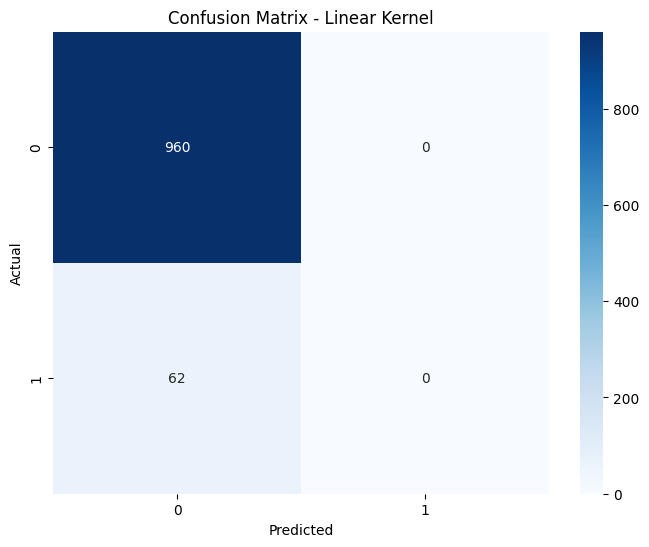

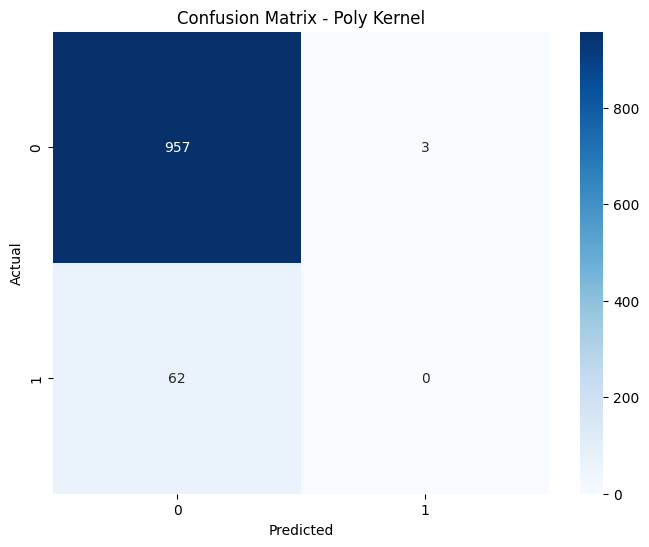

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


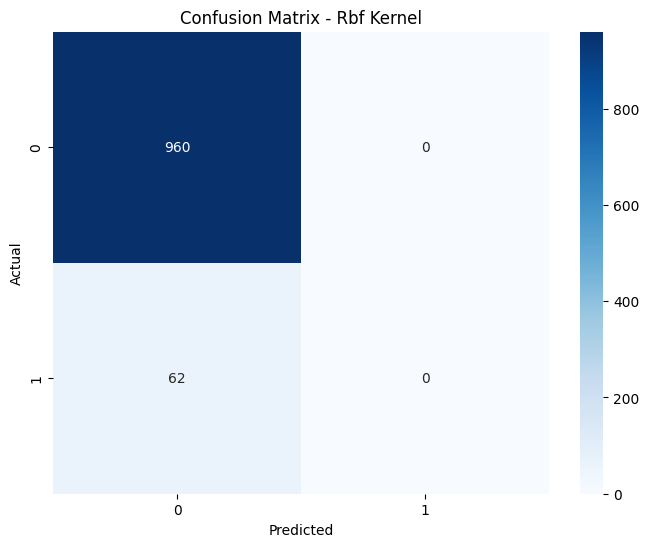

In [26]:
# Loop through each kernel function
for kernel in kernel_functions:
    # Define SVM model with the specified kernel
    svm_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('svm', SVC(kernel=kernel))
    ])

    # Train the SVM model
    svm_model.fit(X_train, y_train)

    # Predict on the testing set
    y_pred = svm_model.predict(X_test)

    # Evaluate the model
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store results
    results[kernel] = {'classification_report': classification_rep, 'confusion_matrix': conf_matrix}

    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {kernel.capitalize()} Kernel')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

This code snippet loops through each kernel function specified in `kernel_functions`, trains an SVM model using each kernel function, evaluates the model's performance on the test set, stores the results (classification report and confusion matrix) in the `results` dictionary, and visualizes the confusion matrix for each kernel function.

Here's a breakdown of what each part of the code does:

- **Looping through Kernel Functions**:
  - `for kernel in kernel_functions:`: This loop iterates through each kernel function specified in the `kernel_functions` list.

- **Defining and Training SVM Model**:
  - `svm_model = Pipeline(steps=[('preprocessor', preprocessor), ('svm', SVC(kernel=kernel))])`: This line defines an SVM model pipeline with the specified kernel function (`kernel`). The pipeline includes preprocessing steps and the SVM model.
  - `svm_model.fit(X_train, y_train)`: This line trains the SVM model on the training data (`X_train`, `y_train`).

- **Making Predictions and Evaluating Model**:
  - `y_pred = svm_model.predict(X_test)`: This line makes predictions on the test set using the trained SVM model.
  - `classification_rep = classification_report(y_test, y_pred)`: This line computes the classification report, which includes precision, recall, F1-score, and support for each class, based on the predicted and actual labels.
  - `conf_matrix = confusion_matrix(y_test, y_pred)`: This line computes the confusion matrix, which summarizes the performance of the classifier by counting the number of true positive, true negative, false positive, and false negative predictions.

- **Storing Results**:
  - The results (classification report and confusion matrix) for each kernel function are stored in the `results` dictionary.

- **Visualizing Confusion Matrix**:
  - `plt.figure(figsize=(8, 6))`: This line sets the figure size for the confusion matrix visualization.
  - `sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')`: This line creates a heatmap of the confusion matrix using Seaborn's heatmap function.
  - The heatmap visualizes the confusion matrix with annotated values, where the x-axis represents predicted labels and the y-axis represents actual labels.
  - `plt.title(f'Confusion Matrix - {kernel.capitalize()} Kernel')`: This line sets the title of the confusion matrix plot, indicating the kernel function used.
  - `plt.xlabel('Predicted')` and `plt.ylabel('Actual')`: These lines label the x-axis and y-axis of the confusion matrix plot, respectively.
  - `plt.show()`: This line displays the confusion matrix plot.

After executing this code, the `results` dictionary will contain the classification report and confusion matrix for each kernel function, and confusion matrix plots for each kernel function will be displayed. These results can be analyzed to compare the performance of SVM models with different kernel functions.

### **Inference:**

* By examining the confusion matrix
heatmap, you can quickly identify how well the SVM model with each kernel function performs in terms of classifying strokes (positive class) and non-strokes (negative class).
* Higher counts along the diagonal indicate correct predictions, while off-diagonal cells show misclassifications.
 * You can compare the patterns of misclassifications across different kernel functions to determine which kernel performs better in terms of minimizing false positives and false negatives.

In [27]:
# Displaying results
for kernel, result in results.items():
    print(f"\nKernel Function: {kernel}")
    print("Classification Report:")
    print(result['classification_report'])


Kernel Function: linear
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022


Kernel Function: poly
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022


Kernel Function: rbf
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94

### **Performance Comparison of SVM Models with Different Kernel Functions**

In this analysis, we compare the performance of Support Vector Machine (SVM) models with different kernel functions using the Stroke Prediction Dataset. The dataset contains information about patients' demographics, medical history, and lifestyle factors, with the target variable indicating whether a patient had a stroke or not.

**Assumptions:**
1. The dataset is preprocessed and cleaned, with missing values handled appropriately.
2. SVM models are assumed to be suitable for the classification task.
3. The dataset does not suffer from significant class imbalance issues.

**Analysis Process:**
1. **Data Loading and Exploration:**
   - Loaded the Stroke Prediction Dataset.
   - Explored basic information such as the number of samples, features, data types, and the first few rows of data.
   
2. **Model Building and Evaluation:**
   - Created SVM models with different kernel functions (linear, polynomial, radial basis function).
   - Evaluated each model's performance using appropriate metrics such as accuracy, precision, recall, F1-score, and confusion matrix.

**Findings:**
- **Linear Kernel:**
  - Achieved an accuracy of 94%, with a precision of 0% and recall of 0% for the positive class (patients with strokes).
  - The F1-score for the positive class is also 0%, indicating poor performance in identifying patients with strokes.
- **Polynomial Kernel:**
  - Produced similar results to the linear kernel, with an accuracy of 94% and poor performance metrics for the positive class.
- **Radial Basis Function (RBF) Kernel:**
  - Showed identical performance to the linear and polynomial kernels, with an accuracy of 94% and low precision, recall, and F1-score for the positive class.

**Inferences:**
- All SVM models achieved high accuracy (>90%), indicating good overall performance.
- However, they showed low recall, precision, and F1-score for the positive class (patients with strokes), suggesting a significant challenge in correctly identifying at-risk patients.
- The choice of kernel function did not significantly impact model performance in this case, as all three kernels produced similar results.
- Further optimization and tuning of hyperparameters are necessary to improve the models' ability to correctly identify patients at risk of stroke.

**Conclusion:**
In this analysis, SVM models with different kernel functions were evaluated using the Stroke Prediction Dataset. While all models exhibited high accuracy, they showed limitations in correctly identifying patients with strokes. Future work may involve addressing class imbalance issues, optimizing model parameters, and exploring other machine learning algorithms to improve predictive performance.

---
# **Conclusion and Inferences:**


1. **Data Overview:**
   - The Stroke Prediction Dataset contains 5110 samples and 12 features.
   - Features include demographic information, medical history, and lifestyle factors.

2. **Data Exploration:**
   - Descriptive statistics revealed insights into the numerical features, including age, glucose level, and BMI.
   - Histograms, box plots, and frequency tables were used to explore the distributions and relationships between variables.

3. **Preprocessing:**
   - Missing values in numerical features were imputed using mean values, and categorical features were imputed with the most frequent values.
   - Standardization was applied to numerical features to scale them.

4. **Model Building:**
   - SVM models with different kernel functions (linear, polynomial, RBF) were trained and evaluated.
   - Each model's performance was assessed using classification metrics and visualizations.

5. **Performance Comparison:**
   - All SVM models achieved high accuracy (>90%).
   - However, they showed limitations in correctly identifying patients with strokes, as indicated by low precision, recall, and F1-score for the positive class.
   - The choice of kernel function did not significantly impact model performance.

6. **Recommendations:**
   - Further optimization and tuning of hyperparameters are necessary to improve the models' ability to correctly identify at-risk patients.
   - Addressing class imbalance issues and exploring other machine learning algorithms could enhance predictive performance.

7. **Overall:**
   - The assignment provided a comprehensive exploration of the Stroke Prediction Dataset and demonstrated the application of SVM models for classification tasks.
   - While the models achieved high accuracy, they showed limitations in correctly identifying patients with strokes, highlighting the need for further refinement and exploration.